In [19]:
#im using CPU hehe
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

No GPU available, using the CPU instead


In [20]:
#do pip install transformers if haven't
!pip install transformers

You should consider upgrading via the 'C:\Users\tiffa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
import pandas as pd

df = pd.read_csv("./GenshinReview.csv")
df.shape

(3116, 2)

In [22]:
df.sample(10)

,score,content
678,5,i love everything about this game but i hope g...
1375,4,it is an amazing game the graphics are on a di...
568,5,this was a great game i meet a lot of people t...
789,4,i have spent two years of my life in this game...
881,4,its a really amazing game tho i am stuck on th...
3008,1,i was just playing yesterday and now i cannot ...
755,5,you guys have no idea how much i love this gam...
2266,3,i love the game but the issue of resin limits ...
567,2,the security in this game needs fixing my year...
1587,4,may as well update my review i would give it f...


In [23]:
#creating label called sentiment from the score reviews
#1-2: negative
#3: neutral
#4-5: positive

def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 0
    elif rating == 3:
        return 1
    elif rating in [4, 5]:
        return 2

df['sentiment'] = df['score'].apply(map_rating_to_sentiment)

df.head(20)

,score,content,sentiment
0,3,the game is amazing it is visuals characters a...,1
1,5,i have been playing for a year and a half now ...,2
2,5,graphics is very good and story line is best,2
3,5,it is a cool game but needs flagship lvl phone...,2
4,5,it is a best game but i have only one problem ...,2
5,5,nothing to say this is my first time play it a...,2
6,3,to big of a game on mobile its like six gb for...,1
7,5,what an amazing game huge map never had a lag ...,2
8,1,the new event does not even work properly the ...,0
9,5,i love this game its my favorite it is just th...,2


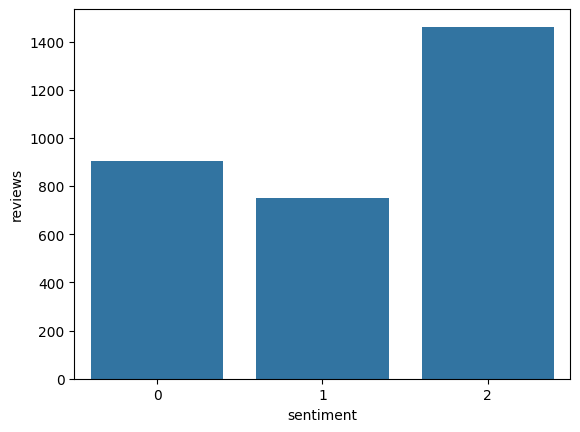

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#for now we have 2000 rows of reviews. we'll add more data perhaps later if the accuracy is still bad.
x = df.sentiment.value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('reviews')
plt.show()

In [25]:
sentences = df.content.values
labels = df.sentiment.values

In [26]:
from transformers import BertTokenizer
#using pretrained bert tokenizer
print("Loading BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Loading BERT Tokenizer


In [27]:
print("Original: ", sentences[0])
#yes it's not perfect, game word terms like primogems are not identified as english word.
print("Tokenized: ", tokenizer.tokenize(sentences[0]))
#tokenization time
print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Original:  the game is amazing it is visuals characters and gameplay are awesome as hell the only problem are the rewards that are way too bad the commissions do not give you the needed primogems for even pull the quests take too much time and again give almost nothing as a reward the events are cool and the developers constantly introduce new mechanics to the game the d anniversary rewards we are awful
Tokenized:  ['the', 'game', 'is', 'amazing', 'it', 'is', 'visual', '##s', 'characters', 'and', 'gameplay', 'are', 'aw', '##eso', '##me', 'as', 'hell', 'the', 'only', 'problem', 'are', 'the', 'reward', '##s', 'that', 'are', 'way', 'too', 'bad', 'the', 'commissions', 'do', 'not', 'give', 'you', 'the', 'needed', 'primo', '##gem', '##s', 'for', 'even', 'pull', 'the', 'quest', '##s', 'take', 'too', 'much', 'time', 'and', 'again', 'give', 'almost', 'nothing', 'as', 'a', 'reward', 'the', 'events', 'are', 'cool', 'and', 'the', 'developers', 'constantly', 'introduce', 'new', 'mechanics', 'to', '

In [28]:
input_ids = []

for sent in sentences:
  encoded_sent = tokenizer.encode(
      sent,
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])


Original:  the game is amazing it is visuals characters and gameplay are awesome as hell the only problem are the rewards that are way too bad the commissions do not give you the needed primogems for even pull the quests take too much time and again give almost nothing as a reward the events are cool and the developers constantly introduce new mechanics to the game the d anniversary rewards we are awful
Token IDs:  [101, 10103, 11336, 10127, 39854, 10197, 10127, 18785, 10107, 18751, 10110, 66362, 10320, 37079, 42279, 10688, 10146, 19575, 10103, 10902, 15640, 10320, 10103, 92306, 10107, 10203, 10320, 12140, 14666, 12428, 10103, 78347, 10154, 10497, 16118, 10855, 10103, 23615, 12195, 21538, 10107, 10139, 12818, 59289, 10103, 17248, 10107, 11622, 14666, 12977, 10573, 10110, 12590, 16118, 16398, 20587, 10146, 143, 92306, 10103, 15017, 10320, 26462, 10110, 10103, 62961, 79296, 52707, 10246, 44984, 10114, 10103, 11336, 10103, 146, 23491, 92306, 10107, 11312, 10320, 37079, 15836, 102]


In [29]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  268


In [30]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 64 values
Padding token: "[PAD]", ID: 0
Done


In [31]:
input_ids[0]

array([  101, 10103, 11336, 10127, 39854, 10197, 10127, 18785, 10107,
       18751, 10110, 66362, 10320, 37079, 42279, 10688, 10146, 19575,
       10103, 10902, 15640, 10320, 10103, 92306, 10107, 10203, 10320,
       12140, 14666, 12428, 10103, 78347, 10154, 10497, 16118, 10855,
       10103, 23615, 12195, 21538, 10107, 10139, 12818, 59289, 10103,
       17248, 10107, 11622, 14666, 12977, 10573, 10110, 12590, 16118,
       16398, 20587, 10146,   143, 92306, 10103, 15017, 10320, 26462,
       10110])

In [32]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)

In [33]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(input_ids,labels, random_state=42, test_size=0.1)
train_mask, test_mask, _, _ = train_test_split(attention_mask, labels, random_state=42, test_size=0.1)

train_input, validation_input, train_labels, validation_labels = train_test_split(train_input, train_labels, random_state= 43, test_size=0.15)
train_mask, validation_mask, _, _ = train_test_split(train_mask, train_mask, random_state=43, test_size=0.15)

In [34]:
import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Validation ==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (2383, 64)
Label:  (2383,)
Mask:  (2383, 64)

== Validation ==
Input:  (421, 64)
Label:  (421,)
Mask:  (421, 64)

== Test ==
Input:  (312, 64)
Label:  (312,)
Mask:  (312, 64)


In [35]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [36]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [37]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (105879, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.

In [39]:
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

C:\Users\tiffa\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
from transformers import get_linear_schedule_with_warmup

epochs = 5

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

In [41]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [42]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [43]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

#Training time
  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0
#only to prepare the model in a state of where it's ready for training
  model.train()

  #for each batch of training data
  for step, batch in enumerate(train_dataloader):
    
    #progress update every 10 batches
    if step % 10 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)
  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

#validation time
  print("Running Validation...")
  t0 = time.time()
  model.eval()
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 5 =======
Training...
Batch    10 of    75.     Elapsed: 0:04:01
Batch    20 of    75.     Elapsed: 0:07:13
Batch    30 of    75.     Elapsed: 0:09:34
Batch    40 of    75.     Elapsed: 0:12:01
Batch    50 of    75.     Elapsed: 0:14:23
Batch    60 of    75.     Elapsed: 0:16:45
Batch    70 of    75.     Elapsed: 0:19:06
   Average training loss: 1.00
   Training epoch took: 0:20:10
Running Validation...
   Accuracy: 0.60
   Validation took: 0:01:01
======= Epoch 2 / 5 =======
Training...
Batch    10 of    75.     Elapsed: 0:02:25
Batch    20 of    75.     Elapsed: 0:04:51
Batch    30 of    75.     Elapsed: 0:07:18
Batch    40 of    75.     Elapsed: 0:09:41
Batch    50 of    75.     Elapsed: 0:12:06
Batch    60 of    75.     Elapsed: 0:14:32
Batch    70 of    75.     Elapsed: 0:16:56
   Average training loss: 0.81
   Training epoch took: 0:18:00
Running Validation...
   Accuracy: 0.64
   Validation took: 0:01:01
======= Epoch 3 / 5 =======
Training...
Batch    10 of  

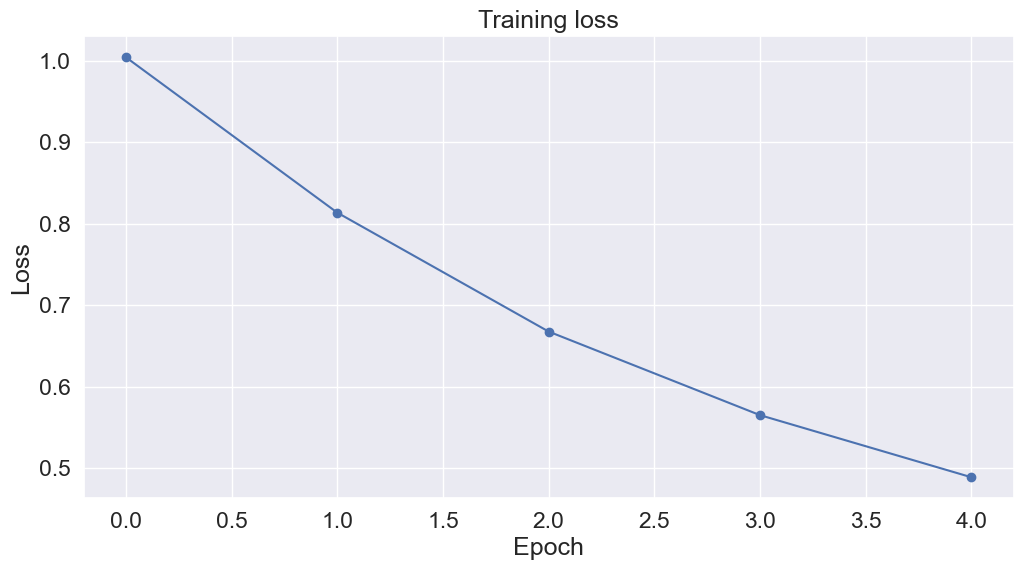

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt


#plotting will be continued once this thing is done training bro
import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [45]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)
    
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print("finally??? done!!!!")

Predicting labels for 312 test sentences
finally??? done!!!!


In [46]:
import numpy as np
import pandas as pd

# Assuming prediction and true_labels are lists

# Convert lists to NumPy arrays
prediction_array = np.concatenate(prediction, axis=0)
true_labels_array = np.concatenate(true_labels, axis=0)

# Create a DataFrame
df = pd.DataFrame({
    'Predicted_Labels': np.argmax(prediction_array, axis=1), 
    'True_Labels': true_labels_array
})

# Display the DataFrame
print(df)

     Predicted_Labels  True_Labels
0                   2            2
1                   2            2
2                   2            2
3                   0            2
4                   2            2
..                ...          ...
307                 2            2
308                 0            0
309                 0            0
310                 2            2
311                 1            1

[312 rows x 2 columns]


In [47]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score


#convert lists to NumPy arrays
flat_prediction = np.concatenate(prediction, axis=0)
flat_true_labels = np.concatenate(true_labels, axis=0)

#calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(flat_true_labels, np.argmax(flat_prediction, axis=1))

print("MATTHEWS_CC: %.3f" % mcc)

#calculate Accuracy
acc = accuracy_score(flat_true_labels, np.argmax(flat_prediction, axis=1))

print("ACCURACY: %.3f" % acc)

#calculate Precision
precision = precision_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("PRECISION: %.3f" % precision)

#calculate Recall
recall = recall_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("RECALL: %.3f" % recall)

#calculate F1-Score
f1 = f1_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("F1 SCORE: %.3f" % f1)

MATTHEWS_CC: 0.487
ACCURACY: 0.686
PRECISION: 0.674
RECALL: 0.686
F1 SCORE: 0.678


In [48]:
import pandas as pd
from sklearn.metrics import accuracy_score

#add a column to df indicating whether the prediction is correct
df['Correct_Prediction'] = df['True_Labels'] == df['Predicted_Labels']

#calculate accuracy
accuracy = accuracy_score(df['True_Labels'], df['Predicted_Labels'])
print("Overall Accuracy: {:.2%}".format(accuracy))

#amount of correct predictions for each sentiment class
for sentiment_class in [0, 1, 2]:  #0 for negative, 1 for neutral, 2 for positive
    correct_predictions = df[df['Correct_Prediction'] & (df['True_Labels'] == sentiment_class)].shape[0]
    total_samples = df[df['True_Labels'] == sentiment_class].shape[0]
    print("Correct {} predictions: {}/{}".format(sentiment_class, correct_predictions, total_samples))

Overall Accuracy: 68.59%
Correct 0 predictions: 65/99
Correct 1 predictions: 20/61
Correct 2 predictions: 129/152


In [49]:
df.head(10)

,Predicted_Labels,True_Labels,Correct_Prediction
0,2,2,True
1,2,2,True
2,2,2,True
3,0,2,False
4,2,2,True
5,0,0,True
6,2,2,True
7,2,1,False
8,0,0,True
9,2,2,True


In [50]:
#drop the 'Correct_Prediction' column if not needed
df = df.drop(columns=['Correct_Prediction'])
df.head(10)

,Predicted_Labels,True_Labels
0,2,2
1,2,2
2,2,2
3,0,2
4,2,2
5,0,0
6,2,2
7,2,1
8,0,0
9,2,2
